In [1]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


In [87]:
from statsmodels.stats.multitest import multipletests

In [3]:
data_path = "./homework_lecture_5_data.csv"

In [4]:
data = pd.read_csv(data_path, index_col = 0)

In [5]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
           dtype='int64', length=1000)

In [6]:
data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [7]:
b_cells_expression_data = data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = data.query("Cell_type == 'NK_cell'")

In [8]:
#b_cells_expression_data.to_csv("b_cells_expression_data.csv")
#nk_cells_expression_data.to_csv("nk_cells_expression_data.csv")

Уточним что размер выборок двух клеточных типов с данными экспрессии равны 

In [9]:
len(b_cells_expression_data) == len(nk_cells_expression_data)

True

In [10]:
b_cells_expression_data

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.091270,21.292559,0.000000,5.111145,4.291092,51.991970,29.190918,0.000000,0.586704,49.823112,...,15.923135,4.375880,0.000000,15.084838,0.000000,17.283436,2.314632,15.504042,54.509686,B_cell
496,24.494837,53.397003,0.004436,0.000000,1.869485,92.877580,17.648138,0.000000,0.486630,23.275782,...,0.000000,118.967490,0.000000,36.090360,0.000000,59.025913,5.747504,10.299628,28.361814,B_cell
497,6.031427,53.015590,0.041065,0.339375,2.213989,106.173010,35.705780,0.004937,0.399671,15.344549,...,10.069483,29.270880,0.000000,21.336897,0.000000,53.501370,3.841926,21.170044,34.345673,B_cell
498,16.592407,58.197968,5.531140,9.906462,6.571997,75.928470,30.512959,0.000000,6.738329,19.562070,...,2.457385,18.326260,0.078343,26.984943,0.552479,48.684544,9.085583,23.428875,273.135700,B_cell


In [11]:
example_gene = "TMCC1"

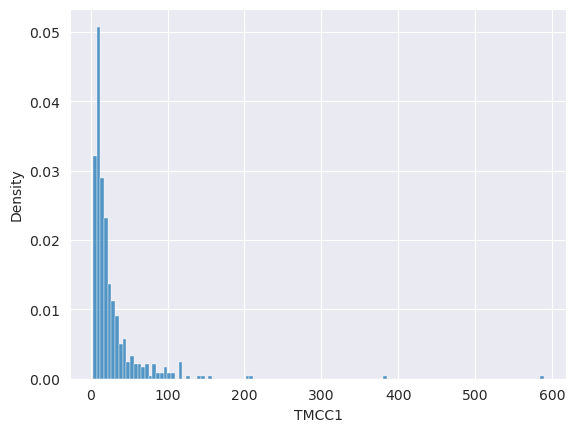

In [12]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");


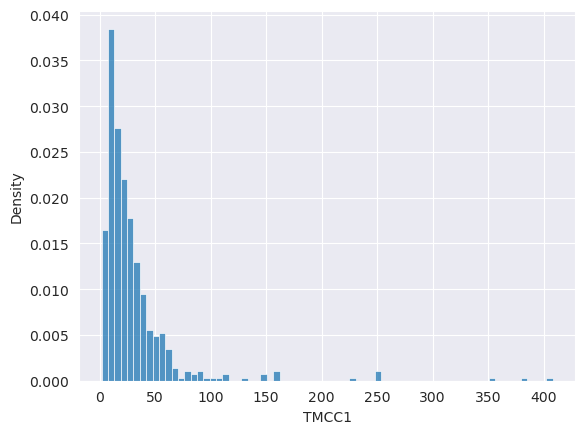

In [13]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Выведем истинные средние экспрессии из двух клеточных типов

In [14]:
nk_cells_expression_data[example_gene].mean()

30.431319600400002

In [15]:
b_cells_expression_data[example_gene].mean()

26.978971829199992

Вроде средние отличаются, вопрос статистически ли достоверно? 

Задание:

##
Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера sample_size, считать среднюю экспрессию и повторять это n_samples раз. Примените эту функцию к экспрессиям гена TMCC1 в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?

In [16]:
def demonstrate_clt(expressions, sample_size = 100, n_samples = 10000):
    sum_ind_random_sample = []
    for _ in range(n_samples):
        random_sample = np.random.choice(expressions, sample_size)
        mean_of_sample = random_sample.mean()
        sum_ind_random_sample.append(mean_of_sample)
    sum_ind_random_sample = np.array(sum_ind_random_sample)
    return sum_ind_random_sample


Сгенерируем выборки, будем дальше с ними работать.

In [18]:
sample_nk = demonstrate_clt(nk_cells_expression_data[example_gene], sample_size = 100, n_samples = 10000)

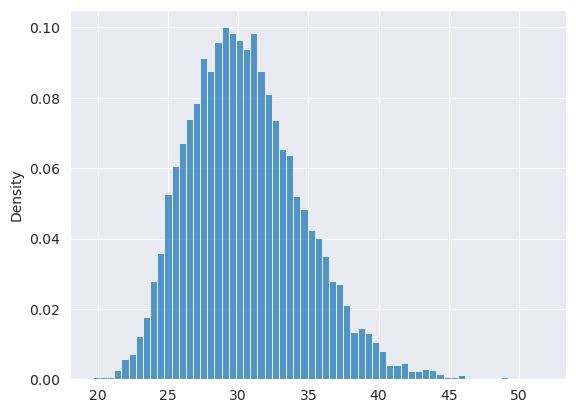

In [19]:
sns.histplot(sample_nk, stat="density");

In [20]:
len(nk_cells_expression_data)

500

In [21]:
sample_nk.mean()

30.532819106858597

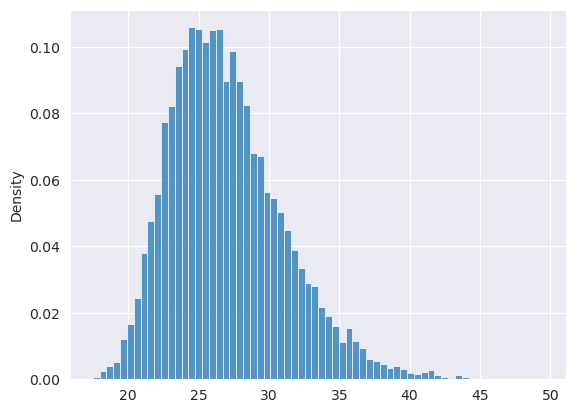

In [22]:
b_cell_sample = demonstrate_clt(b_cells_expression_data[example_gene], sample_size = 100, n_samples = 10000)
sns.histplot(b_cell_sample, stat="density");

In [23]:
b_cell_sample.mean()

27.005035084043698

Реализуем функцию считающую доверительные интервалы для оценки мат ожидания, поскольку станадартное отклонение генеральной совокупности известно, оценить параметр мат ожидания можно используя квантили
 нормального распределения.


In [94]:
def manual_calculate_CI(population, gene, sample, alpha = 0.05): #alpha - допустимый уровень ошибки 1 рода
    tail_alpha = alpha/2
    quantile = scipy.stats.norm.ppf(tail_alpha)
    sigma = population[gene].std()
    sem = sigma / np.sqrt(len(sample))
    left_bound, right_bound = sample.mean() + quantile*sem, sample.mean() - quantile*sem
    return left_bound, right_bound





Пример как ведут себя доверительнные интервалы при разных alpha (порог ошибки первого рода):
1) alpha - очень маленькое, границы доверительных интервалов широкие (покрывают почти всю вероятностную массу)
2) alpha - почти единица(множественные сравнения), границы доверительных интервалов узкие (покрывают узкую вероятностную массу), фактически вырождаются(

In [25]:
manual_calculate_CI(b_cells_expression_data, example_gene, b_cell_sample, alpha = 1e-10)

(24.38580780587004, 29.624262362217355)

In [26]:
#при множественном тестировании гипотез alpha подскакивает к единице

In [90]:
manual_calculate_CI(b_cells_expression_data, example_gene, sample, alpha = 0.01)

(25.872975960565682, 27.959486987094316)

In [91]:
manual_calculate_CI(nk_cells_expression_data, example_gene, sample_nk, alpha = 0.01)

(29.4817905068662, 31.583847706850992)

In [77]:
def check_intervals_intersect(first_ci, second_ci):
    L1, R1 = first_ci
    L2, R2 = second_ci
    if L1 >= R2:
        are_intersect = False
    elif L2 >= R1:
        are_intersect = False
    elif L1 < R2 or L2 > R1:
        are_intersect = True
    return are_intersect # True or False

In [81]:
data.columns[:-1]   #all genes

Index(['TMCC1', 'RANBP3', 'GABRG3', 'ARRDC5', 'LRP3', 'TIMM23', 'TBPL1',
       'BIRC8', 'TTC28', 'C19orf66',
       ...
       'CFAP221', 'MAGEA6', 'IL4I1', 'LCN12', 'SMG6', 'C1orf100', 'WDR75',
       'ZBTB26', 'SPTY2D1', 'PLEKHA2'],
      dtype='object', length=18792)

In [92]:
def check_dge_with_ci(one_cell_ds, two_cell_ds, multiple_corrections: int , method = "bonferroni"):
    ci_test_results = []
    alpha =  1 - (1 - 0.05)**len(one_cell_ds.columns[:-1])  # возводим в степень  на кол-во гипотез == генов
    if multiple_corrections:    # если есть multiple_corrections, корректируем alpha для входа в вычисление доверительного интервала
      _, _, _, alpha  = multipletests(pvals = [1]*len(one_cell_ds.columns[:-1]) , alpha=alpha, method=method, is_sorted=False, returnsorted=False)
    for gene in one_cell_ds.columns[:-1]:
        one_cell_sample = np.random.choice(one_cell_ds[gene], 10000)    # сгенерируем случайную выборку для каждого гена
        two_cell_sample = np.random.choice(two_cell_ds[gene], 10000)
        first_ci = manual_calculate_CI(one_cell_ds, gene, one_cell_sample, alpha)
        second_ci = manual_calculate_CI(two_cell_ds, gene, two_cell_sample, alpha)
        res = check_intervals_intersect(first_ci, second_ci)
        ci_test_results.append(res)
    return ci_test_results

In [93]:
check_dge_with_ci(b_cells_expression_data, nk_cells_expression_data, multiple_corrections=0)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [102]:
from statsmodels.stats.weightstats import ztest

In [103]:
def check_dge_with_ztest(first_table, second_table, multiple_corrections, method = 'bonferroni'):
    z_test_results = []
    p_values = []
    alpha = 1 - (1 - 0.05)**len(first_table.columns[:-1])   #критическое значение ошибки 1 рода для тестирования всех генов
    for gene in first_table.columns[:-1]:
        _, p_value = ztest(first_table[gene], second_table[gene])
        p_values.append(p_value)
    if not multiple_corrections:    # если нет multiple_corrections, сравниваем с не поправленным alpha
        for p_value in p_values:
            if p_value <= alpha:
                z_test_results.append(True)
            else:
                z_test_results.append(False)
    else:
        z_test_results, p_values, _, _ = multipletests(pvals = p_values, alpha=alpha, method=method, is_sorted=False, returnsorted=False)
    return z_test_results, p_values

In [104]:
def calc_mean_diff(table1, table2):
    genes = table1.columns[:-1]
    mean_diff = []
    for gene in genes:
        mean_b_cell = table1.loc[:, gene].mean()
        mean_nk_cell = table2.loc[:, gene].mean()
        diff = mean_b_cell - mean_nk_cell
        mean_diff.append(diff)
    return mean_diff
    


In [114]:
def dfg_analyze(data_path, multiple_corrections: int):
    '''

    :param data_path: путь до данных экспрессии двух клеточных типов
    :param multiple_corrections: 1 если есть множественное тестирование, 0 - если нет.
    :return:
    '''
    data = pd.read_csv(data_path, index_col = 0)
    b_cell_data = data.query("Cell_type == 'B_cell'")
    nk_cell_data = data.query("Cell_type == 'NK_cell'")
    ci_test_results = check_dge_with_ci(b_cell_data, nk_cell_data, multiple_corrections=multiple_corrections)
    z_test_results, z_test_p_values = check_dge_with_ztest(b_cell_data, nk_cell_data, multiple_corrections = multiple_corrections)
    mean_diff = calc_mean_diff(b_cell_data, nk_cell_data)
    results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff}
    results = pd.DataFrame(results)
    return results



In [115]:
data_path = "./homework_lecture_5_data.csv"

In [116]:
dag = dfg_analyze(data_path, 1)

In [117]:
dag

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,False,1.00000,-3.452348
1,False,False,1.00000,-6.473981
2,True,False,1.00000,0.763407
3,False,False,1.00000,-3.334424
4,False,False,1.00000,2.725465
...,...,...,...,...
18787,True,False,1.00000,0.071215
18788,False,False,1.00000,3.675664
18789,True,False,1.00000,1.322516
18790,False,False,1.00000,-2.393473


0        True
1        True
2        True
3        True
4        True
         ... 
18787    True
18788    True
18789    True
18790    True
18791    True
Name: ci_test_results, Length: 18792, dtype: bool